# Lab 10 - LDA and QDA
## Lecture 10

In [1]:
library('ggplot2')
library('reshape2')

In [2]:
g1 <- data.frame(group=1,x = rnorm(100,1,1))
g2 <- data.frame(group=2,x = rnorm(100,5,1))
g3 <- data.frame(group=3,x = rnorm(100,20,1))
d = rbind(g1,g2,g3)
d$group <- as.factor(d$group)

In [3]:
head(d[sample(nrow(d)),])

,group,x
,<fct>,<dbl>
257,3,18.970720
250,3,19.334327
241,3,19.439723
8,1,-1.595908
259,3,18.828366
226,3,20.445360


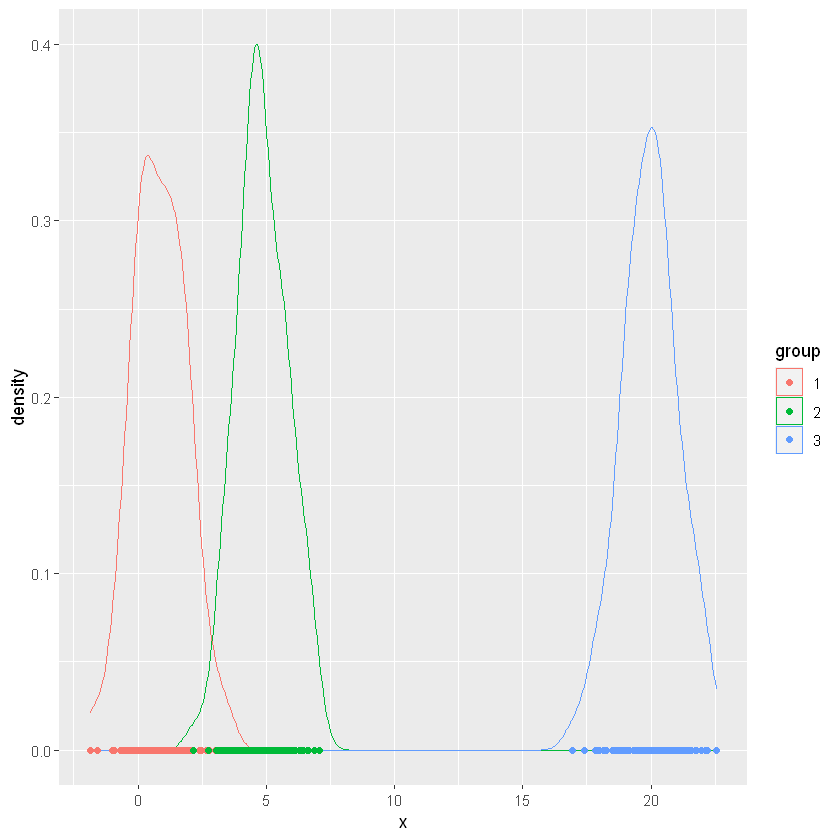

In [4]:
ggplot(data=d,mapping=aes(x=x,color=group,group=group))+geom_density()+geom_point(mapping=aes(x=x,y=0))

In [5]:
delta_lda2=function(x0,class){
  subd = d[d$group==class,]
  muhat = mean(subd$x)
  sighat = sqrt(mean(aggregate(x~group,data=d,FUN=var)[,2]))
  pi_hat = mean(d$group==class)
  muhat*x0/(sighat^2) - muhat^2/(2*sighat^2)+log(pi_hat)
}

In [6]:
lda_pred <- data.frame(
  '1'=delta_lda2(d$x,1),
  '2'=delta_lda2(d$x,2),
  '3'=delta_lda2(d$x,3)
)
lda_preds = apply(lda_pred,1,which.max)
sample(lda_preds,5)

[1] 1 2 1 3 1

In [7]:
ests = function(predfn){
  xs = seq(min(d$x),max(d$x),.01)
  lda_pred <- data.frame(
    '1'=predfn(xs,1),
    '2'=predfn(xs,2),
    '3'=predfn(xs,3)
  )
  mlda_pred = melt(cbind(lda_pred,xs),id.vars='xs')
  colnames(mlda_pred)<-c('x','group','value')
  levels(mlda_pred$group) <- 1:3
  lda_preds = data.frame('x'=xs,apply(lda_pred,1,which.max))
  colnames(lda_preds) <- c('x','group')
  lda_preds$group <- as.factor(lda_preds$group)
  return(list(pfn=mlda_pred,preds=lda_preds))
}

Warning message:
"Removed 2720 row(s) containing missing values (geom_path)."


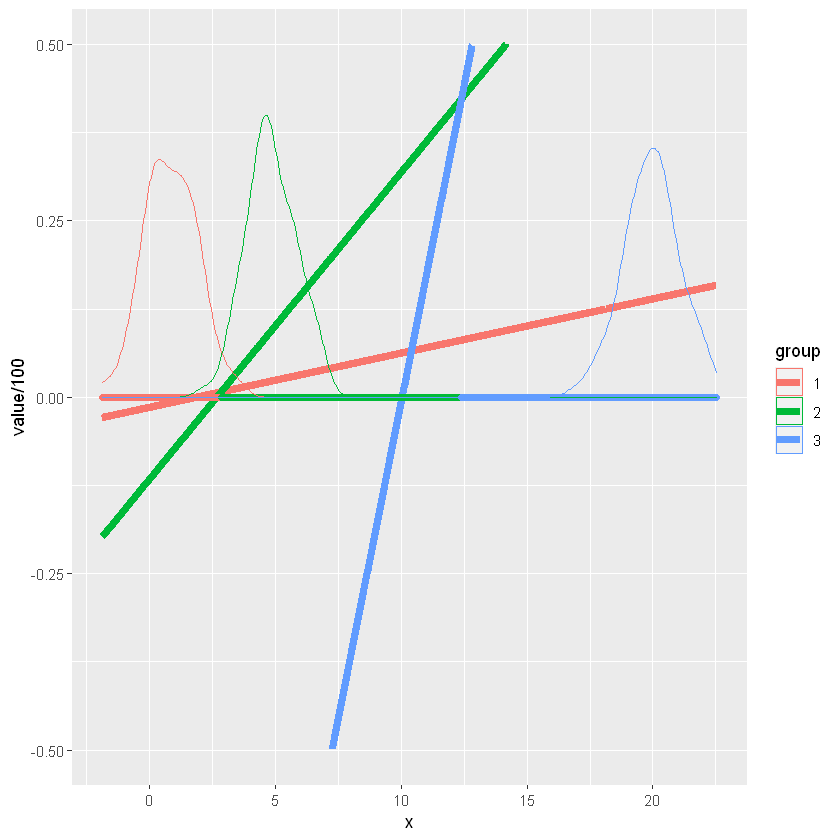

In [8]:
ests_lda2 = ests(delta_lda2)
ggplot(data=ests_lda2$pfn,mapping=aes(x=x,y=value/100,color=group))+geom_line(size=2)+geom_point(data=ests_lda2$preds,mapping=aes(x=x,y=0))+
  geom_density(data=d,mapping=aes(x=x,color=group,group=group),inherit.aes=FALSE)+ylim(-.5,.5)

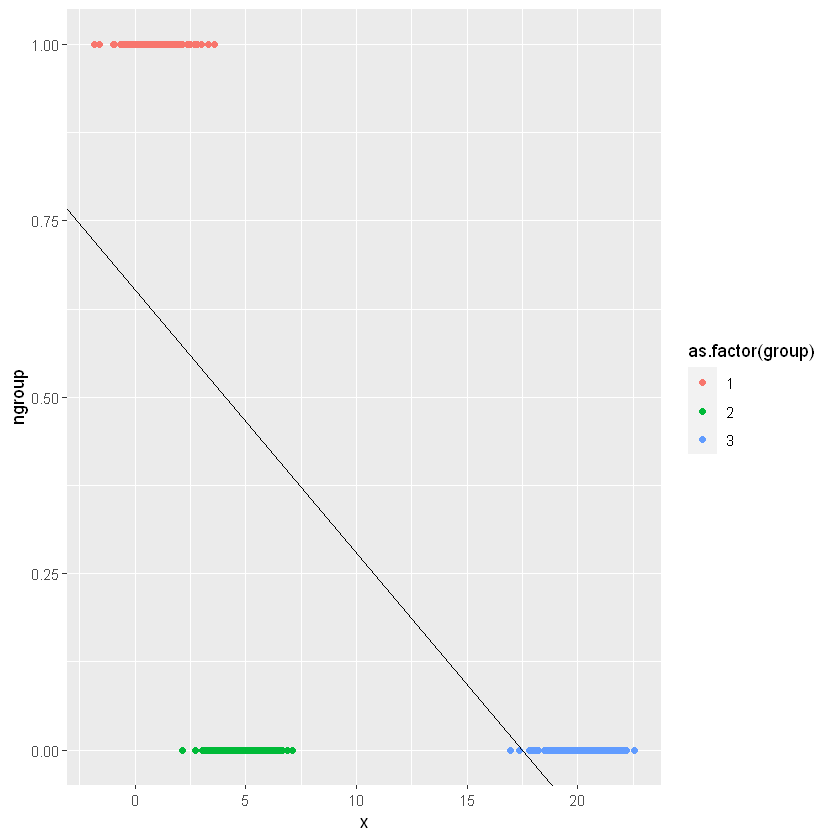

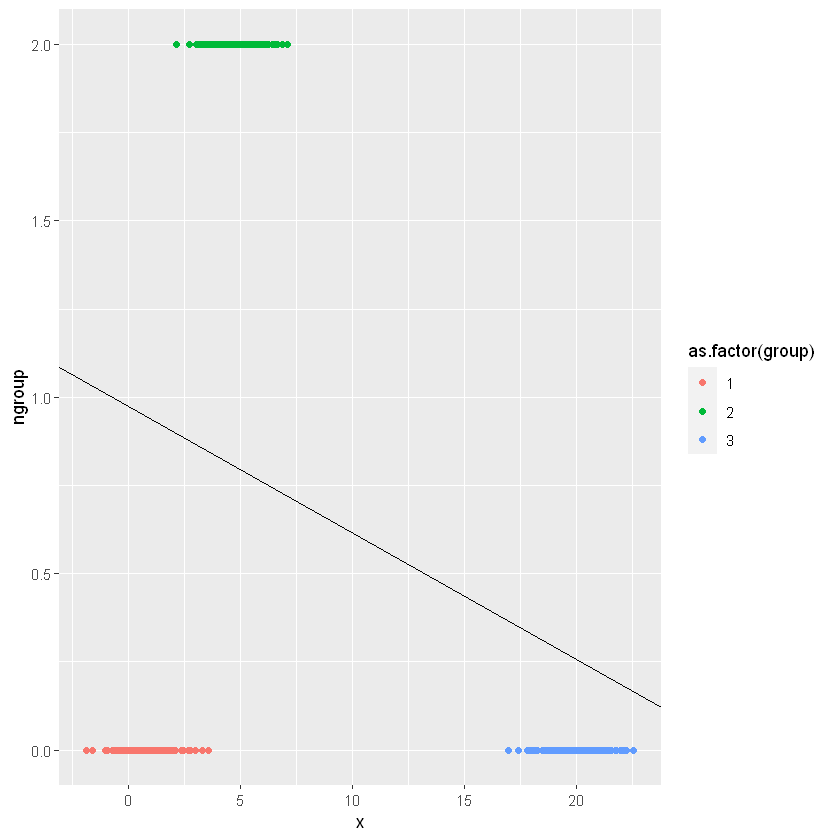

Warning message:
"Removed 2456 row(s) containing missing values (geom_path)."


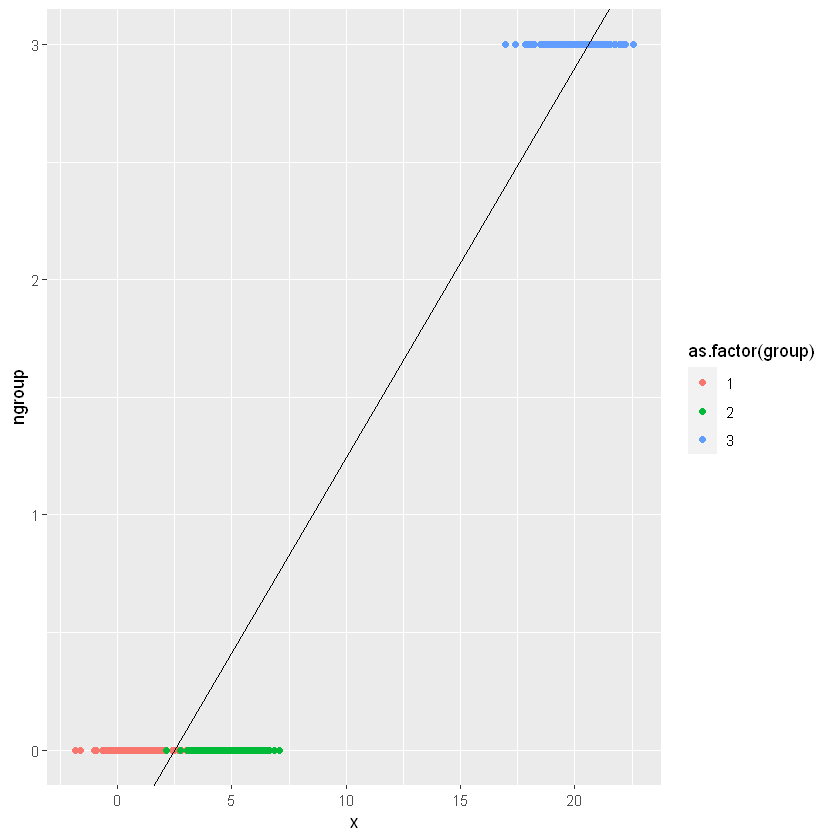

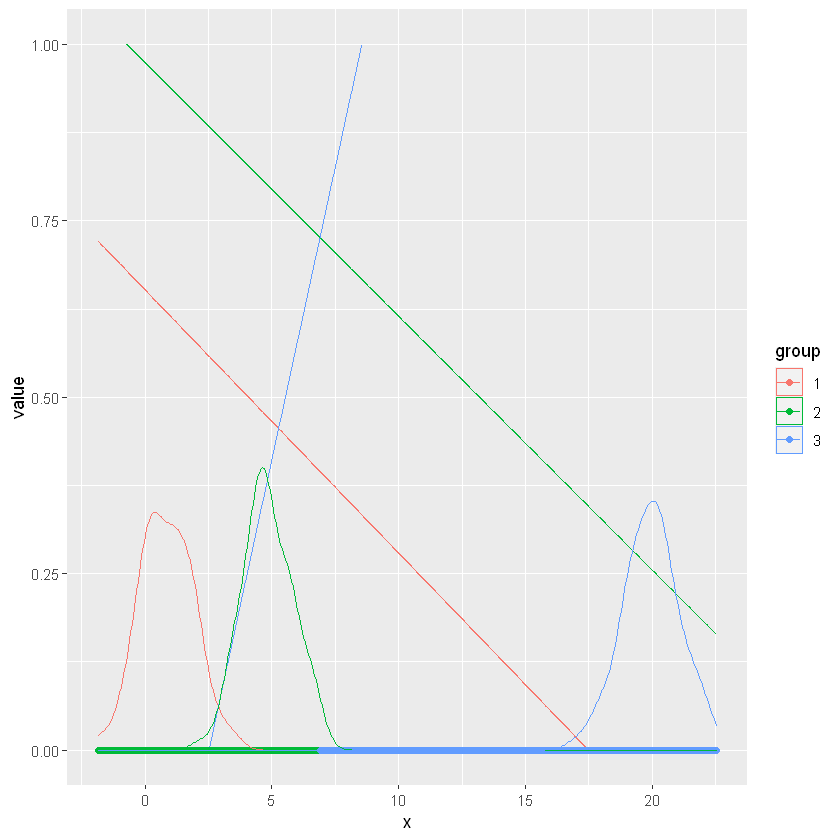

In [9]:
delta_lm=function(x0,class){
  d1 = d
  d1$ngroup=as.numeric(d1$group)
  d1$ngroup[d1$ngroup!=class] <- 0
  mod1 = lm(ngroup~x,data=d1)
  ggplot(data=d1,mapping=aes(x=x,y=ngroup,color=as.factor(group)))+geom_point()+
    geom_abline(intercept=coef(mod1)[1],slope=coef(mod1)[2])
  return(coef(mod1)[1] + coef(mod1)[2]*x0)
}

plot_lm=function(class){
  d1 = d
  d1$ngroup=as.numeric(d1$group)
  d1$ngroup[d1$ngroup!=class] <- 0
  mod1 = lm(ngroup~x,data=d1)
  print(ggplot(data=d1,mapping=aes(x=x,y=ngroup,color=as.factor(group)))+geom_point()+
    geom_abline(intercept=coef(mod1)[1],slope=coef(mod1)[2]))
}

plot_lm(1)
plot_lm(2)
plot_lm(3)

ests_lm = ests(delta_lm)
ggplot(data=ests_lm$pfn,mapping=aes(x=x,y=value,color=group))+geom_line()+geom_point(data=ests_lm$preds,mapping=aes(x=x,y=0))+ylim(0,1)+
  geom_density(data=d,mapping=aes(x=x,color=group,group=group),inherit.aes=FALSE)

# LDA for p > 1 

In [10]:
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [11]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [12]:
library('MASS')

In [14]:
?lda

lda {MASS},R Documentation
formula,"A formula of the form groups ~ x1 + x2 + ... That is, the response is the grouping factor and the right hand side specifies the (non-factor) discriminators."
data,"An optional data frame, list or environment from which variables specified in formula are preferentially to be taken."
x,(required if no formula is given as the principal argument.) a matrix or data frame or Matrix containing the explanatory variables.
grouping,(required if no formula principal argument is given.) a factor specifying the class for each observation.
prior,"the prior probabilities of class membership. If unspecified, the class proportions for the training set are used. If present, the probabilities should be specified in the order of the factor levels."
tol,A tolerance to decide if a matrix is singular; it will reject variables and linear combinations of unit-variance variables whose variance is less than tol^2.
subset,"An index vector specifying the cases to be used in the training sample. (NOTE: If given, this argument must be named.)"
na.action,"A function to specify the action to be taken if NAs are found. The default action is for the procedure to fail. An alternative is na.omit, which leads to rejection of cases with missing values on any required variable. (NOTE: If given, this argument must be named.)"
method,"""moment"" for standard estimators of the mean and variance, ""mle"" for MLEs, ""mve"" to use cov.mve, or ""t"" for robust estimates based on a t distribution."
CV,"If true, returns results (classes and posterior probabilities) for leave-one-out cross-validation. Note that if the prior is estimated, the proportions in the whole dataset are used."


In [15]:
?qda

qda {MASS},R Documentation
formula,"A formula of the form groups ~ x1 + x2 + ... That is, the response is the grouping factor and the right hand side specifies the (non-factor) discriminators."
data,"An optional data frame, list or environment from which variables specified in formula are preferentially to be taken."
x,(required if no formula is given as the principal argument.) a matrix or data frame or Matrix containing the explanatory variables.
grouping,(required if no formula principal argument is given.) a factor specifying the class for each observation.
prior,"the prior probabilities of class membership. If unspecified, the class proportions for the training set are used. If specified, the probabilities should be specified in the order of the factor levels."
subset,"An index vector specifying the cases to be used in the training sample. (NOTE: If given, this argument must be named.)"
na.action,"A function to specify the action to be taken if NAs are found. The default action is for the procedure to fail. An alternative is na.omit, which leads to rejection of cases with missing values on any required variable. (NOTE: If given, this argument must be named.)"
method,"""moment"" for standard estimators of the mean and variance, ""mle"" for MLEs, ""mve"" to use cov.mve, or ""t"" for robust estimates based on a t distribution."
CV,"If true, returns results (classes and posterior probabilities) for leave-out-out cross-validation. Note that if the prior is estimated, the proportions in the whole dataset are used."
nu,"degrees of freedom for method = ""t""."


In [16]:
dset = iris[,c('Species','Sepal.Length','Sepal.Width')]
head(dset)

,Species,Sepal.Length,Sepal.Width
,<fct>,<dbl>,<dbl>
1,setosa,5.1,3.5
2,setosa,4.9,3.0
3,setosa,4.7,3.2
4,setosa,4.6,3.1
5,setosa,5.0,3.6
6,setosa,5.4,3.9


In [17]:
lda_mod = lda(Species~.,data=dset)

In [18]:
lda_mod

Call:
lda(Species ~ ., data = dset)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width
setosa            5.006       3.428
versicolor        5.936       2.770
virginica         6.588       2.974

Coefficients of linear discriminants:
                   LD1        LD2
Sepal.Length -2.141178 -0.8152721
Sepal.Width   2.768109 -2.0960764

Proportion of trace:
   LD1    LD2 
0.9628 0.0372 

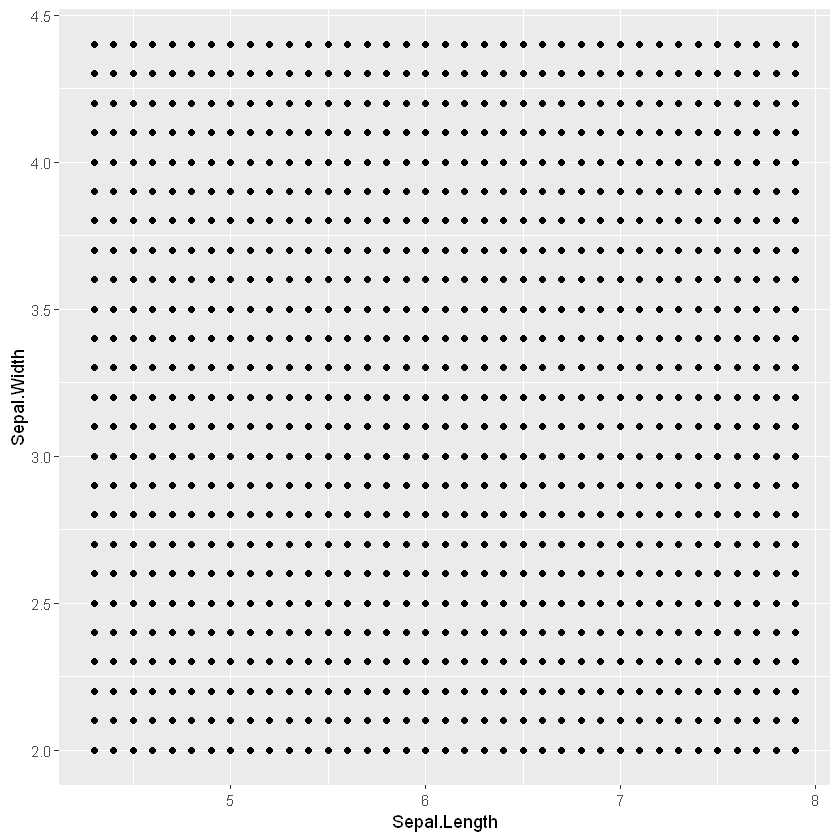

In [21]:
x1r = range(dset$Sepal.Length)
x2r = range(dset$Sepal.Width)
x1s = seq(x1r[1],x1r[2],.1)
x2s = seq(x2r[1],x2r[2],.1)
grd = expand.grid(x1s,x2s)
colnames(grd) = c('Sepal.Length','Sepal.Width')
ggplot(data=grd,mapping=aes(x=Sepal.Length,y=Sepal.Width))+geom_point()

In [34]:
grd_pred = predict(lda_mod,newdata=grd)
grd_pred$posterior[c(1,123,57),]
grd_pred$class[c(1,123,57)]

,setosa,versicolor,virginica
1,1.677388e-02,0.9749839,0.008242183
123,1.172572e-04,0.8850476,0.114835190
57,1.307450e-08,0.4835910,0.516409037


[1] versicolor versicolor virginica 
Levels: setosa versicolor virginica

In [37]:
grd_df = cbind(grd,grd_pred$class)
colnames(grd_df) = c('Sepal.Length','Sepal.Width','Pred')
head(grd_df)

,Sepal.Length,Sepal.Width,Pred
,<dbl>,<dbl>,<fct>
1,4.3,2,versicolor
2,4.4,2,versicolor
3,4.5,2,versicolor
4,4.6,2,versicolor
5,4.7,2,versicolor
6,4.8,2,versicolor


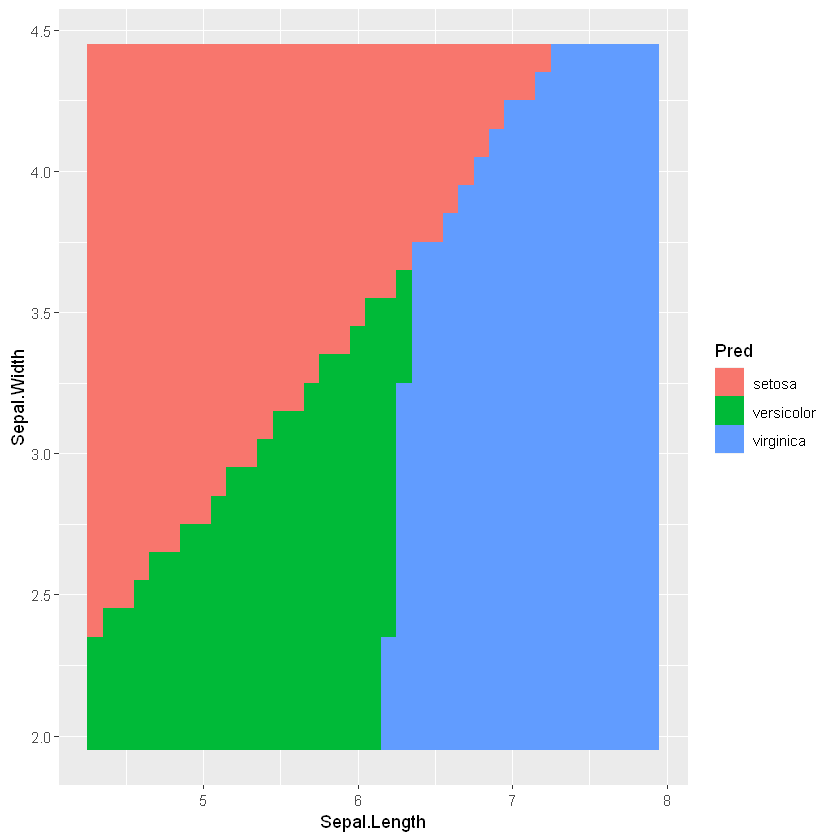

In [38]:
ggplot(data=grd_df,mapping=aes(x=Sepal.Length,y=Sepal.Width,fill=Pred))+geom_tile()

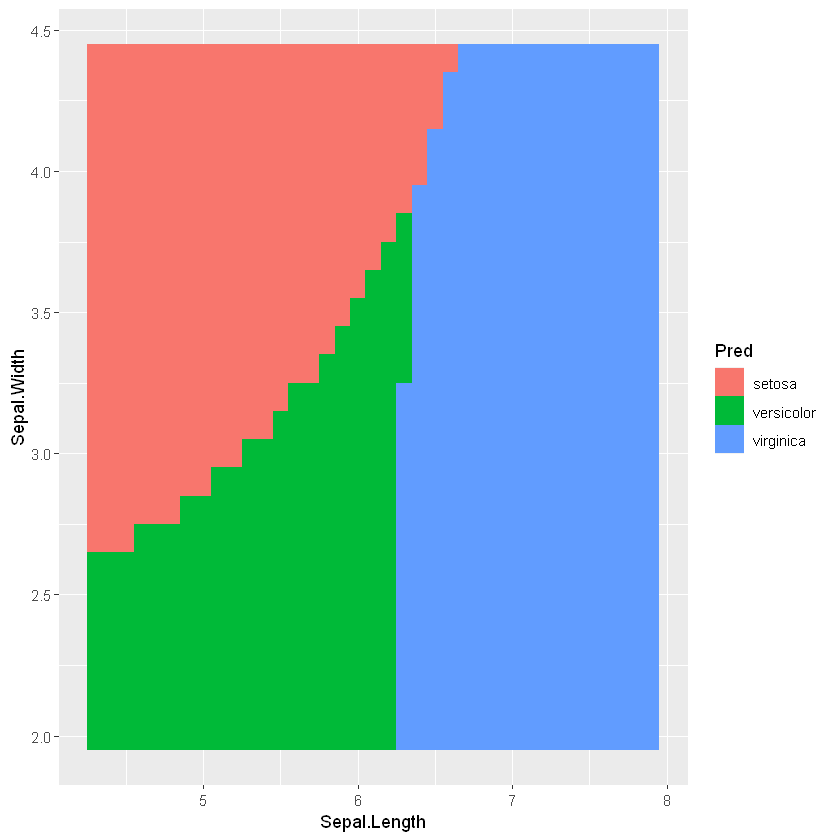

In [43]:
plot_mod = function(mod){
    x1r = range(dset$Sepal.Length)
    x2r = range(dset$Sepal.Width)
    x1s = seq(x1r[1],x1r[2],.1)
    x2s = seq(x2r[1],x2r[2],.1)
    grd = expand.grid(x1s,x2s)
    colnames(grd) = c('Sepal.Length','Sepal.Width')
    grd_pred = predict(mod,newdata=grd)
    grd_df = cbind(grd,grd_pred$class)
    colnames(grd_df) = c('Sepal.Length','Sepal.Width','Pred')
    ggplot(data=grd_df,mapping=aes(x=Sepal.Length,y=Sepal.Width,fill=Pred))+geom_tile()
}

mod = lda(Species~Sepal.Length*Sepal.Width,data=dset)
plot_mod(mod)

In [44]:
model.matrix(mod)

,(Intercept),Sepal.Length,Sepal.Width,Sepal.Length:Sepal.Width
1,1,5.1,3.5,17.85
2,1,4.9,3.0,14.70
3,1,4.7,3.2,15.04
4,1,4.6,3.1,14.26
5,1,5.0,3.6,18.00
6,1,5.4,3.9,21.06
7,1,4.6,3.4,15.64
8,1,5.0,3.4,17.00
9,1,4.4,2.9,12.76
10,1,4.9,3.1,15.19


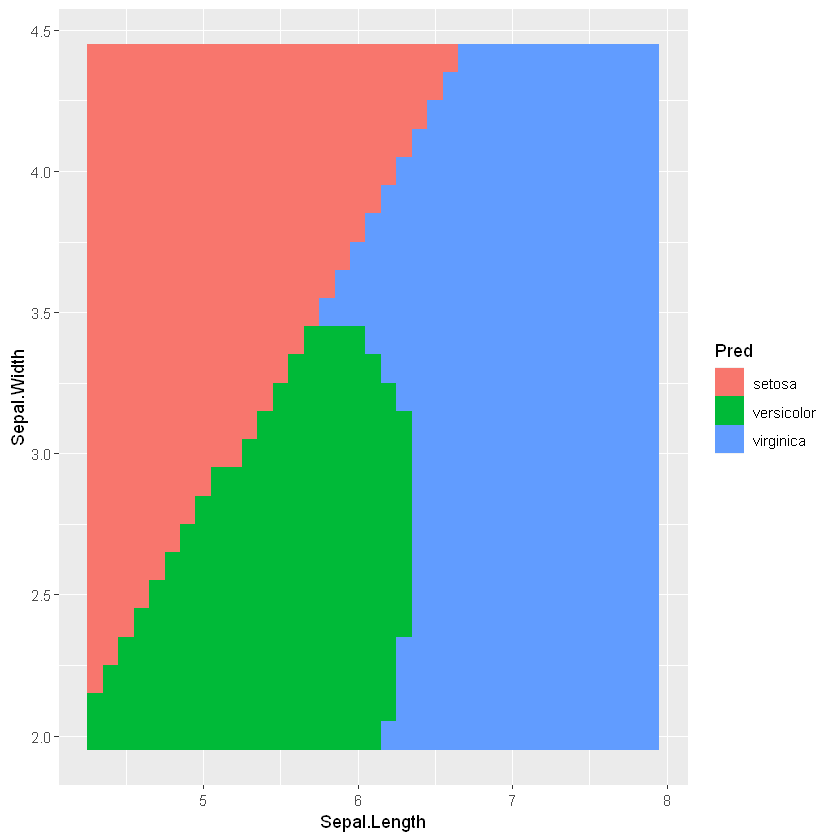

In [46]:
mod = qda(Species~Sepal.Length+Sepal.Width,data=dset)
plot_mod(mod)

,(Intercept),Sepal.Length,Sepal.Width,I(Sepal.Width^2),I(Sepal.Length^2),Sepal.Length:Sepal.Width
1,1,5.1,3.5,12.25,26.01,17.85
2,1,4.9,3.0,9.00,24.01,14.70
3,1,4.7,3.2,10.24,22.09,15.04
4,1,4.6,3.1,9.61,21.16,14.26
5,1,5.0,3.6,12.96,25.00,18.00
6,1,5.4,3.9,15.21,29.16,21.06


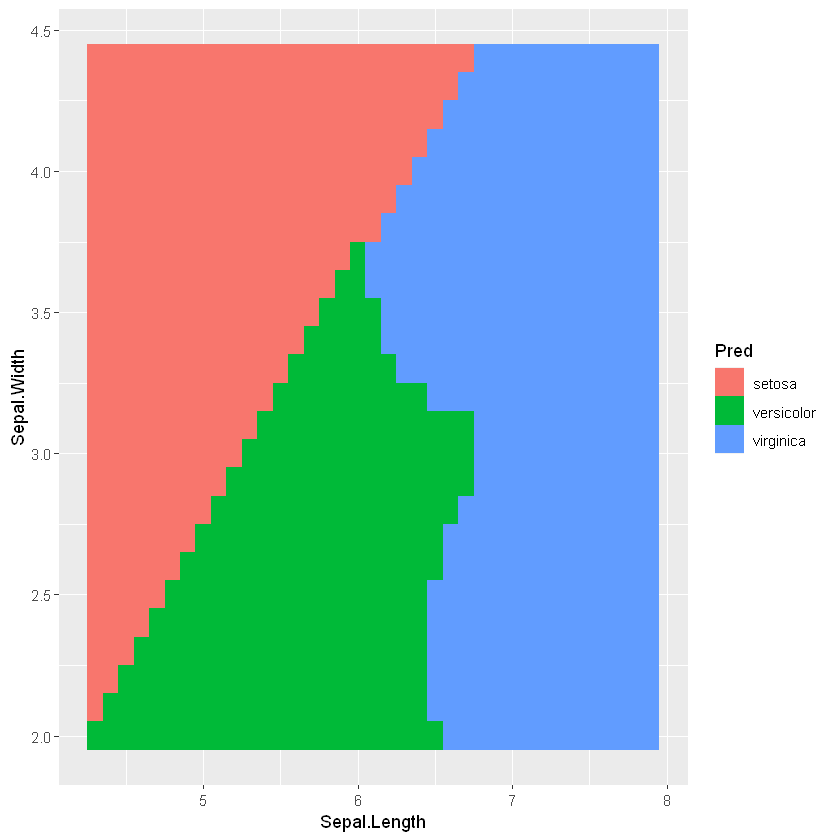

In [52]:
mod = qda(Species~Sepal.Length*Sepal.Width+I(Sepal.Width^2)+I(Sepal.Length^2),data=dset)
plot_mod(mod)
head(model.matrix(mod))